# Discovering Exoplanets Around Distant Stars

By [Erin Hayes](https://www.ast.cam.ac.uk/people/Erin.Hayes), [Erik Rosenberg](https://www.ast.cam.ac.uk/people/erik.rosenberg), and [Steve Young](https://www.ast.cam.ac.uk/people/Steven.Young)

(INFORMATION ON EXOPLANETS) - Steve

In this notebook, you will learn how astronomers use data from NASA's Kepler Space Telescope to discover over 5,000 exoplanets orbiting around other stars in our galaxy, the Milky Way.

## How to use this notebook:

Much like the notebooks you take to school, this notebook is a way to organize what you're learning all in one place. It consists of many "cells" which like the pages of your notebook. Each cell can contain one or many ideas. You can see the first cell of our notebook below this text. Try clicking on the cell and reading the text:

In [2]:
# This is a cell!
# It is where we keep all of our ideas about the project we are working on!

In order to "run" a cell – which is like telling the computer to "read" a page of the notebook – you should press Shift + Enter together on your keyboard. Click on the cell below and try running it!

In [3]:
# Do you know what 12*7 is equal to? Let's ask the computer!
# Press Shift + Enter to 

print(f"12 * 7 = {12*7}")

12 * 7 = 84


Great! Now that we can run our cells, we can have the computer perform lots of math, make graphs for us, and more! Let's use the power of the computer to learn more about exoplanets below.

## What is a light curve?

Light curves measure the brightness of a star over time, in a graph like this:

Mounted at /content/drive


(0.0, 2.0)

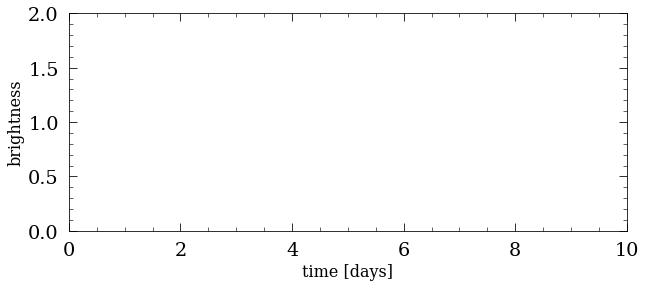

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
plt.style.use('/content/drive/MyDrive/IoA/IWD/Transit Session/style/style.mplstyle')
plt.figure(figsize=(10,4)) #this line tells the computer we want to make a "figure" or graph
plt.xlabel('time [days]') #this line makes an x-axis label with the text "time [days]"
plt.ylabel('brightness') #this line makes an y-axis label with the text "brightness"
plt.xlim(0, 10)
plt.ylim(0, 2)

### The Kepler telescope was sent into space to observe the light curves of millions of stars. Most stars stay the same brightness for very long periods of time (millions of years!), so light curves often look very flat over time.

Run the cell below to see what a light curve of a "normal" star might look like!

(0.0, 1.5)

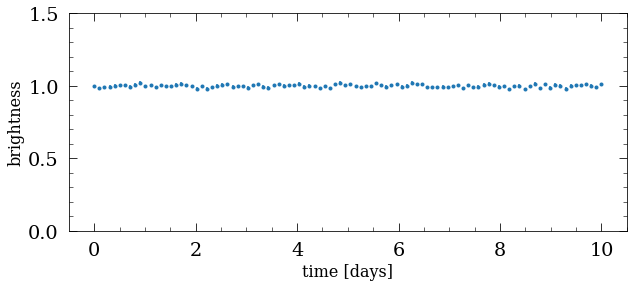

In [10]:
import numpy as np
plt.figure(figsize=(10,4))

N_obs = 100                                                  #set the number of observations of the star
times = np.linspace(0, 10, N_obs)                            #make a list of N_obs times at which to observe the star
constant_star_brightness = np.repeat(1.0, N_obs)             #make a list that has N_obs observations of the star of brightness = 1
constant_star_brightness += np.random.normal(0, 0.01, N_obs) #add some random scatter to the constant data
brightness_err = np.repeat(0.01, N_obs)                      #the errorbars on each brightness measurement
plt.errorbar(times, constant_star_brightness, yerr=brightness_err, ls='None', marker='.') #plot the data with errorbars

plt.xlabel('time [days]')
plt.ylabel('brightness')
plt.ylim(0,1.5)

### However, when an exoplanet passes in front of the star, the brightness of the star decreases because the exoplanet blocks the light! The light curve is left with a dip in it like you see in this video:

<br>
<img src="https://github.com/erinhay/outreach/blob/main/IWD/images/transit_gif.gif?raw=1" alt="Alternative text" />
<br>

By observing stars and looking for dips in their brightnesses, astronomers can identify which stars 

In [47]:
def model(times, period, R_p, error=True):
  """
  Model adapted from Mandel & Agol 2002
  """

  R_star = 696_340 #km, 1 solar radius

  a = 1.5e7 #km

  rate = 2*np.pi*a / period
  s = rate * (times-(period/4))
  d = a * (1 - np.cos(s / a))

  p = R_p/R_star
  zs = d/R_star

  lamdba = np.zeros(len(zs))
  for i, z in enumerate(zs):
    if z > 1+p:
      lamdba[i] = 0
    elif z > np.abs(1-p) and z < 1+p:
      k0 = np.arccos((p**2 + z**2 - 1)/(2*p*z))
      k1 = np.arccos((1 - p**2 + z**2)/(2*z))
      root = ((2*z)**2 - (1 + z**2 - p**2)**2) / 4
      lamdba[i] = ((k0 * p**2) + k1 - np.sqrt(root)) / np.pi
    elif z <= 1-p:
      lamdba[i] = p**2
    elif z <= p-1:
      lamdba[i] = 1

  brightness = np.ones(len(zs)) - lamdba
  if error:
    error_scale = 0.0005
    brightness += np.random.normal(0, error_scale, len(zs))
    error = np.repeat(error_scale, len(zs))
    return brightness, error

  return brightness

(0.98, 1.005)

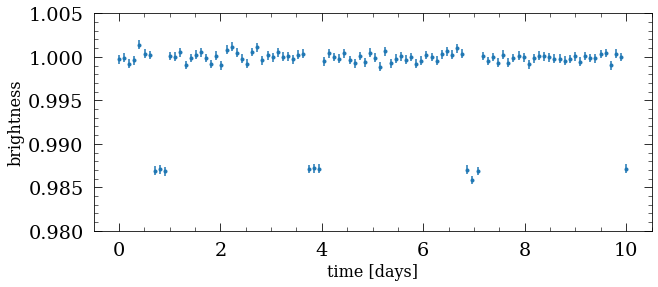

In [48]:
plt.figure(figsize=(10,4))

N_obs = 100
times = np.linspace(0, 10, N_obs)

exoplanet_radius = 80_000      #the radius of the exoplanet in km
period_of_transit = 3.1        #the period of the exoplanet's orbit in days
                               #in other words, the number of days it takes for the exoplanet to make one revolution around its host star

brightness, error = model(times, period_of_transit, exoplanet_radius)

plt.errorbar(times, brightness, yerr=error, ls='None', marker='.')

plt.xlabel('time [days]')
plt.ylabel('brightness')
plt.ylim(0.98,1.005)

What do you think will happen if you make the radius of the exoplanet smaller? How about if you make the period of the orbit larger?

Try changing the code in the following cell to check if your guesses are correct!

(0.98, 1.005)

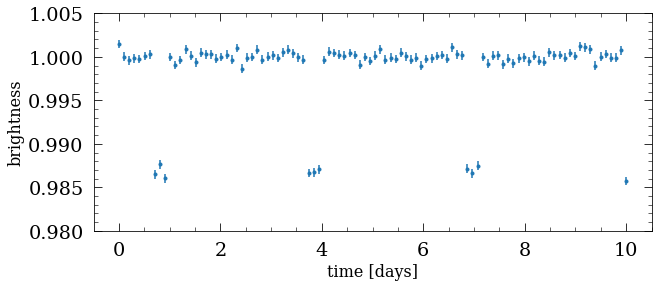

In [49]:
plt.figure(figsize=(10,4))

N_obs = 100
times = np.linspace(0, 10, N_obs)

exoplanet_radius = 80_000      #first, change the radius of the exoplanet so that its smaller than 80,000 km
period_of_orbit = 3.1          #then, change the period of the orbit so that its larger than 3.6 days

brightness, error = model(times, period_of_orbit, exoplanet_radius)

plt.errorbar(times, brightness, yerr=error, ls='None', marker='.')

plt.xlabel('time [days]')
plt.ylabel('brightness')
plt.ylim(0.98,1.005)

Hopefully you saw that making the radius of the exoplanet smaller causes a dip that is smaller because less light from the star is being blocked. 



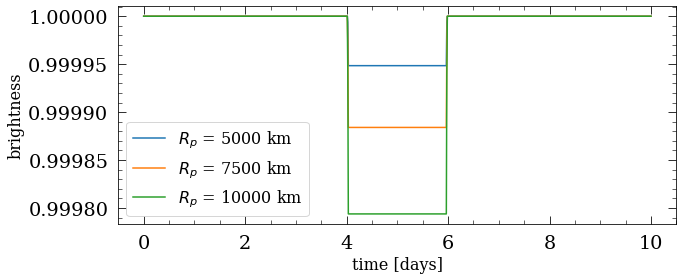

In [62]:
plt.figure(figsize=(10,4))

N_obs = 1000
times = np.linspace(0, 10, N_obs)

period_of_orbit = 20

for radius in [5_000, 7_500, 10_000]:
  template = model(times, period_of_orbit, radius, error=False)
  plt.plot(times, template, label=f'$R_p$ = {radius} km')

plt.xlabel('time [days]')
plt.ylabel('brightness')
plt.legend()

You might also have noticed that making the period larger caused there to be fewer dips in the 10 day period shown on the graph. Each dip, though, was stretched out wider when the period was made larger.

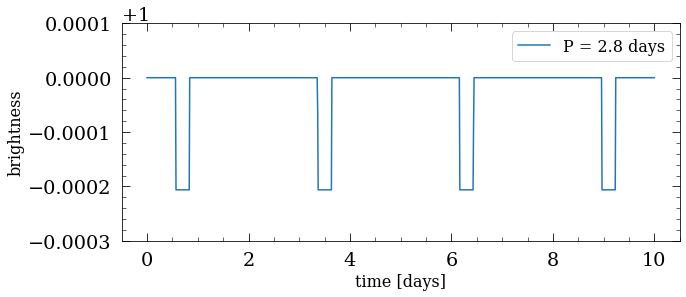

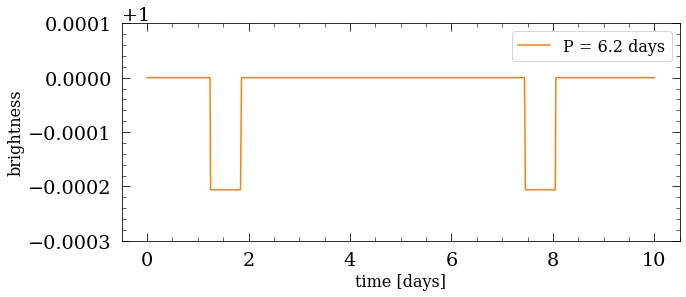

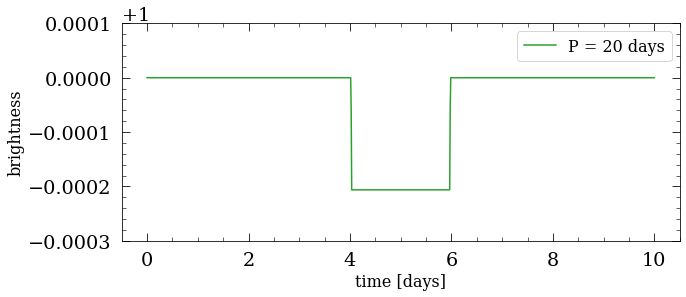

In [61]:
N_obs = 1000
times = np.linspace(0, 10, N_obs)
colors = ['tab:blue', 'tab:orange', 'tab:green']

exoplanet_radius = 10_000

for i, period in enumerate([2.8, 6.2, 20]):
  plt.figure(figsize=(10,4))

  template = model(times, period, exoplanet_radius, error=False)
  plt.plot(times, template, label=f'P = {period} days', c=colors[i])

  plt.xlabel('time [days]')
  plt.ylabel('brightness')
  plt.ylim(0.9997, 1.0001)
  plt.legend()

### Using the sliders below, try to match the template (shown in blue) to the data (shown in orange) to figure out what the radius and period of the exoplanet is!

Text(0, 0.5, 'brightness')

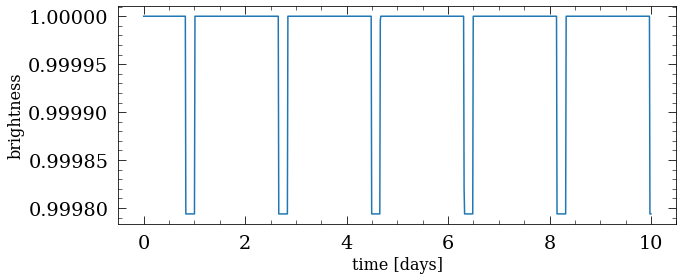

In [133]:
plt.figure(figsize=(10,4))

#xdata = 
#ydata = 

N_obs = 1000
times = np.linspace(0, 10, N_obs)

exoplanet_radius = 10_000
period_of_orbit = 1.83
template = model(times, period_of_orbit, exoplanet_radius, error=False)

#plt.plot(xdata, ydata)
plt.plot(times, template)

plt.xlabel('time [days]')
plt.ylabel('brightness')

In [ ]:
# give simulated data with known radius
## make sample data file

## Detecting Exoplanet Transits

Now that we know what to look for, we can look at **real** data from the Kepler telescope! 

In [ ]:
# sliders - Erik

In [ ]:
# bigger introduction on Kepler - Erik
# fit a real light curve (Kepler 1658 b: https://exoplanets.nasa.gov/exoplanet-catalog/6502/kepler-1658-b/) - Steve
## figure out light kurve ?
# different subtypes of exoplanets (additional light curves?) - Erin
## plot of radius vs mass for exoplanet

Not all planets look alike! Depending on factors like the radius of the exoplanet and how fast it is moving around its host star (aka its period), planets can have very different properties.

Think about our own solar system:

<br>
<img src="https://github.com/erinhay/outreach/blob/b5297201c89dffa9340d823dc56b4a870aa4a894/IWD/images/solar_system.png" alt="Alternative text" />
<br>

Mercury, Venus, Earth, and Mars are relatively small rocky planets. Jupiter, Saturn, Neptune, and Uranus are much larger, gaseous planets.

Just like there are different types of planets in our solar system, there are lots of different types of exoplanets.

<br>
<img src="https://github.com/erinhay/outreach/blob/306aee58743bb42e9ee833540657ddc5386c79a7/IWD/images/types_of_exoplanets.png" alt="Alternative text" />
<br>

